# Introdução

Todas as bases de dados utilizadas neste projeto são bases públicas, sendo descritas a seguir:

Dados de trafégo da Apple: 
Dados sobre o coronavirus na cidade de São Paulo:
Fases do Plano São Paulo:
Dados de uso do transporte público (SPTrans): 


# Análise Exploratória das bases de dados

Importa as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carrega a base de dados de localização da Apple

In [2]:
# The code was removed by Watson Studio for sharing.

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,162.41,164.63,169.36,190.83,206.45,202.15,178.29,168.26,169.05,176.53
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,127.42,128.96,131.30,133.39,137.95,116.08,134.41,131.60,125.50,121.19
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,54.61,55.66,57.26,67.02,63.70,37.80,53.91,56.84,58.40,59.01
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,43.16,41.49,42.23,49.10,46.25,32.78,41.44,44.63,46.32,46.18
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,92.33,93.33,98.55,98.50,75.84,83.95,87.17,91.46,92.73,98.44


Gera um dataframe contendo somente os dados da cidade de São Paulo

In [3]:
locomocao_sp = locomocao_apple.loc[locomocao_apple['region']=='Sao Paulo'].copy()
locomocao_sp.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30
789,city,Sao Paulo,driving,São Paulo,São Paulo (state),Brazil,100.0,103.97,104.59,104.15,...,79.83,80.79,83.03,88.98,87.44,63.17,78.90,82.28,79.23,78.21
790,city,Sao Paulo,transit,São Paulo,São Paulo (state),Brazil,100.0,103.28,107.25,101.29,...,49.69,47.30,46.33,44.39,35.66,28.52,50.76,52.03,47.19,44.60
791,city,Sao Paulo,walking,São Paulo,São Paulo (state),Brazil,100.0,111.06,110.09,100.63,...,56.45,58.81,57.09,58.60,57.08,33.36,56.14,60.45,54.66,52.58


Identifica a última data do dataset

In [4]:
last_day = locomocao_sp.columns.values[-1]
print(last_day)

2020-07-30


Tratamento do dataframe para que as datas sejam linhas de uma única coluna, além disso seleciona os dados relevantes para a nossa tarefa

In [5]:
# Cria um dataFrame com os dados de pedestres por dia e tipo de transporte
locomocao_sp = pd.concat([locomocao_sp.loc[:,'transportation_type'], locomocao_sp.loc[:,'2020-01-13':'2020-07-30']],axis=1)
# Seleciona as colunas que contém as datas
locomocao_sp = locomocao_sp.T
# Reseta o index
locomocao_sp.reset_index(level=0, inplace=True)
# Nomeia as colunas
locomocao_sp.columns = ['data','porcentagemCarro','porcentagemTransportePublico','porcentagemPedestre']
locomocao_sp.drop([0],inplace=True)
#walking_sp.head()
locomocao_sp.head() 

,data,porcentagemCarro,porcentagemTransportePublico,porcentagemPedestre
1,2020-01-13,100,100,100
2,2020-01-14,103.97,103.28,111.06
3,2020-01-15,104.59,107.25,110.09
4,2020-01-16,104.15,101.29,100.63
5,2020-01-17,109.81,96.59,105.01


Plota a série temporal para exibir graficamente a porcentagem de pessoas se locomovendo em cada categoria. <br> 
Esses percentuais são calculados em relação ao primeiro dia de coleta (13/01/2020)

<Figure size 4500x4500 with 0 Axes>

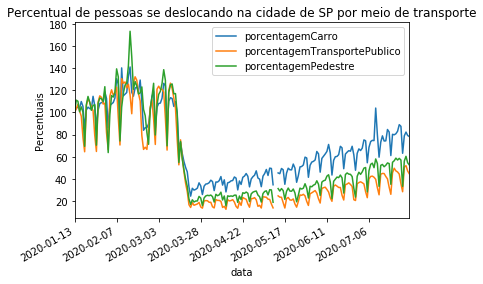

<Figure size 4500x4500 with 0 Axes>

In [6]:
locomocao_sp.plot(x='data')
plt.gcf().autofmt_xdate()
plt.ylabel('Percentuais')
plt.title('Percentual de pessoas se deslocando na cidade de SP por meio de transporte')
plt.figure(figsize=(30, 30), dpi= 150, facecolor='w', edgecolor='k')

Uma análise visual dos dados nos mostra que existe uma queda brusca no deslocamento das pessoas na cidade de São Paulo durante a segunda metade do mês de Março, o que coincide com o início do agravamento da pandemia na cidade. Vê-se que a movimentação das pessoas apresenta uma tendência de crescimento após essa queda. <br>
<br>

Como os dados sobre o coronavirus parecem ter correlação com este perfil, vamos analisar a base de dados sobre a pandemia na cidade de São Paulo

In [7]:

body = client_28a432fbf78f48ce9acfcab26f517796.get_object(Bucket='analiseexploratoria-donotdelete-pr-semjubu2s2zrii',Key='casosCovid.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_covid = pd.read_csv(body)
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459314 entries, 0 to 459313
Data columns (total 17 columns):
city                                             455503 non-null object
city_ibge_code                                   457144 non-null float64
date                                             459314 non-null object
epidemiological_week                             459314 non-null int64
estimated_population_2019                        457144 non-null float64
is_last                                          459314 non-null bool
is_repeated                                      459314 non-null bool
last_available_confirmed                         459314 non-null int64
last_available_confirmed_per_100k_inhabitants    446754 non-null float64
last_available_date                              459314 non-null object
last_available_death_rate                        459314 non-null float64
last_available_deaths                            459314 non-null int64
order_for_place             

Gera um novo dataframe contendo somente os dados relativos à cidade de São Paulo. 
<br> Seleciona as colunas que utilizaremsos em nossa análise, a saber:<br>
- Data 
- Pacientes confirmados por 100.000 habitantes
- Número de novos pacientes confirmados em relação ao dia anterior


In [8]:
df_covid_sp = df_covid.loc[df_covid['city']=='São Paulo']
# Seleciona os dados de interesse
#df_covid_sp = df_covid_sp[['date','last_available_confirmed','last_available_confirmed_per_100k_inhabitants']].copy()
df_covid_sp = df_covid_sp[['date','last_available_confirmed_per_100k_inhabitants','new_confirmed']].copy()
# Renomeia os headers
#df_covid_sp.rename(columns = {'date':'data','last_available_confirmed':'confirmados','last_available_confirmed_per_100k_inhabitants':'confirmadosPor100k'},inplace=True)
df_covid_sp.rename(columns = {'date':'data','last_available_confirmed_per_100k_inhabitants':'confirmadosPor100k','new_confirmed':'novos_casos'},inplace=True)
df_covid_sp.head(20)

,data,confirmadosPor100k,novos_casos
0,2020-02-25,0.00816,1
2,2020-02-26,0.00816,0
4,2020-02-27,0.00816,0
6,2020-02-28,0.01632,1
8,2020-02-29,0.01632,0
10,2020-03-01,0.01632,0
12,2020-03-02,0.01632,0
14,2020-03-03,0.01632,0
16,2020-03-04,0.02449,1
19,2020-03-05,0.04897,3


Exibimos então os gráficos da evolução da pandemia na cidade de São Paulo

<Figure size 4500x4500 with 0 Axes>

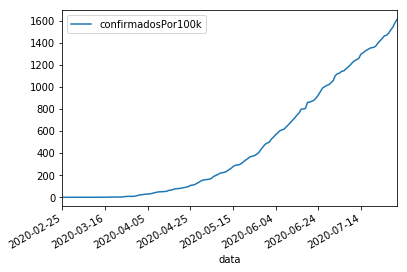

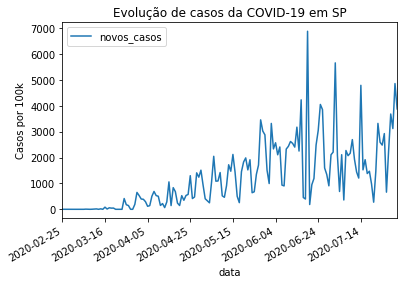

<Figure size 4500x4500 with 0 Axes>

In [9]:
df_covid_sp.plot(x='data',y='confirmadosPor100k')
plt.gcf().autofmt_xdate()
df_covid_sp.plot(x='data',y='novos_casos')
plt.gcf().autofmt_xdate()
plt.ylabel('Casos por 100k')
plt.title('Evolução de casos da COVID-19 em SP')
plt.figure(figsize=(30, 30), dpi= 150, facecolor='w', edgecolor='k')

O gráfico do aumento de casos diários na cidade de São Paulo parece um pouco ruidoso. Isso se deve, conforme foi noticiado na imprensa, a inconcistências na atualização da base de dados. <br>
Uma estratégia para lidarmos com isso é aplicar uma média móvel sobre os dados:

Text(0.5, 1.0, 'Média móvel dos novos casos de COVID-19 na cidade de SP')

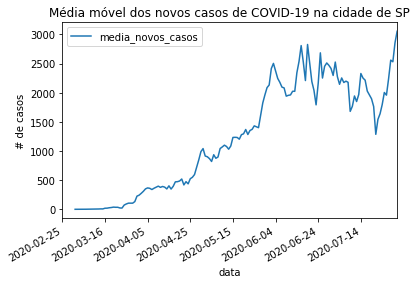

In [10]:
# Calcula a média móvel
df_covid_sp['media_novos_casos'] = df_covid_sp['novos_casos'].rolling(7).mean()
# Plota o gráfico da média móvel de novos casos
df_covid_sp.plot(x='data',y='media_novos_casos')
plt.gcf().autofmt_xdate()
plt.ylabel('# de casos')
plt.title('Média móvel dos novos casos de COVID-19 na cidade de SP')

Carrega o dataset com as fases do plano São Paulo

In [11]:
body = client_28a432fbf78f48ce9acfcab26f517796.get_object(Bucket='analiseexploratoria-donotdelete-pr-semjubu2s2zrii',Key='fasesPlanoSP.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_planoSP = pd.read_csv(body,sep=';')
df_planoSP.head()

,Data,FasePlanoSP
0,2020-06-03,Laranja
1,2020-06-04,Laranja
2,2020-06-05,Laranja
3,2020-06-06,Laranja
4,2020-06-07,Laranja


Carrega a base de dados do trafégo de pessoas no transporte público para determinadas regiões de SP.

In [12]:

body = client_28a432fbf78f48ce9acfcab26f517796.get_object(Bucket='analiseexploratoria-donotdelete-pr-semjubu2s2zrii',Key='base_sptrans.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_sptrans = pd.read_csv(body,sep=';',encoding='ISO-8859-1',low_memory=False)
df_sptrans['Total'] = pd.to_numeric(df_sptrans['Total'], errors='coerce')
df_sptrans.head()

,Data,Linha,origem,destino,Total
0,2020-01-01,N10311,TERM PIRITUBA,TERM LAPA,119.0
1,2020-01-01,N13111,TERM LAPA,VILA PIAUI,44.0
2,2020-01-01,N13211,TERM PIRITUBA,PQ SAO DOMINGOS,37.0
3,2020-01-01,N13311,TERM PIRITUBA,CID D ABRIL 3? G,15.0
4,2020-01-01,N13411,TERM CACHOEIRINHA,TAIPAS,183.0


Vamos plotar os dados para um determinado destino, por exemplo o Bom Retiro e ver o comportamento temporal do fluxo de pessoas para essa região. <br>
Para isso iremos preparar o dataframe antes, agrupando os destinos pela data, já que existe mais uma linha para o mesmo destino:

In [13]:
name_region = 'PINHEIROS'
df_region = df_sptrans.loc[df_sptrans['destino'] == name_region].copy()
df_region.drop(['Linha','origem'],axis=1,inplace=True)
df_region_day = df_region[['Data','Total']].groupby(by='Data').agg('sum')
df_region_day.reset_index(inplace=True)
df_region_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 2 columns):
Data     207 non-null object
Total    207 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


Text(0.5, 1.0, 'Passageiros com destino PINHEIROS')

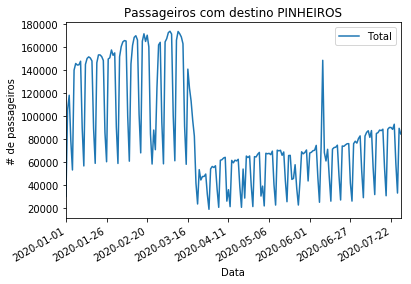

In [14]:
df_region_day.plot(x='Data',y='Total')
plt.gcf().autofmt_xdate()
plt.ylabel('# de passageiros')
plt.title('Passageiros com destino ' + str(name_region))

# Preparação dos Dados 

### Tratamento de missing data

A análise do gráfico de locomoção indica dados faltantes na base de dados de locomoção da Apple. <br>
Assim, exibimos a informações do dataset sobre locomoção em SP:

In [15]:
locomocao_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
data                            200 non-null object
porcentagemCarro                198 non-null object
porcentagemTransportePublico    198 non-null object
porcentagemPedestre             198 non-null object
dtypes: object(4)
memory usage: 7.8+ KB


Como indicado, existem dois dados faltantes. <br>
Faremos o preenchimento destes dados utilizando uma interpolação linear

In [16]:
# Converte as colunas de porcentagem para o dtype float e preenche os valores faltantes por meio de uma interpolação linear
locomocao_sp['porcentagemCarro'] = (locomocao_sp['porcentagemCarro'].astype(float)-100)/100
locomocao_sp['porcentagemTransportePublico'] = (locomocao_sp['porcentagemTransportePublico'].astype(float)-100)/100
locomocao_sp['porcentagemPedestre'] = (locomocao_sp['porcentagemPedestre'].astype(float)-100)/100
locomocao_sp.interpolate(method ='linear', limit_direction ='forward', inplace=True)
# Exibe informações do dataFrame
locomocao_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
data                            200 non-null object
porcentagemCarro                200 non-null float64
porcentagemTransportePublico    200 non-null float64
porcentagemPedestre             200 non-null float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


Text(0.5, 1.0, 'Locomoção por meio de transporte')

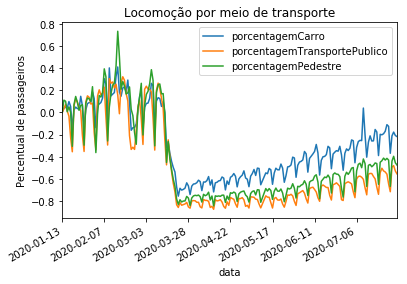

In [17]:
locomocao_sp.plot(x='data')
plt.gcf().autofmt_xdate()
plt.ylabel('Percentual de passageiros')
plt.title('Locomoção por meio de transporte')

Fazemos a junção dos dataframes criados até o momento para gerarmos o dataframe com todos os dados que avaliaremos no modelo:

In [18]:
df_modelo = pd.merge(locomocao_sp,df_covid_sp,on='data',how='left')
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 7 columns):
data                            200 non-null object
porcentagemCarro                200 non-null float64
porcentagemTransportePublico    200 non-null float64
porcentagemPedestre             200 non-null float64
confirmadosPor100k              157 non-null float64
novos_casos                     157 non-null float64
media_novos_casos               151 non-null float64
dtypes: float64(6), object(1)
memory usage: 12.5+ KB


In [19]:
df_modelo.fillna(0,inplace=True)
df_modelo.head()

,data,porcentagemCarro,porcentagemTransportePublico,porcentagemPedestre,confirmadosPor100k,novos_casos,media_novos_casos
0,2020-01-13,0.0000,0.0000,0.0000,0.0,0.0,0.0
1,2020-01-14,0.0397,0.0328,0.1106,0.0,0.0,0.0
2,2020-01-15,0.0459,0.0725,0.1009,0.0,0.0,0.0
3,2020-01-16,0.0415,0.0129,0.0063,0.0,0.0,0.0
4,2020-01-17,0.0981,-0.0341,0.0501,0.0,0.0,0.0


In [20]:
df_planoSP.rename(columns = {'Data':'data'},inplace=True)
df_modelo = pd.merge(df_modelo,df_planoSP,on='data',how='left')
df_modelo.fillna(0,inplace=True)

# Cria um mapa para as fases do Plano São Paulo
planoSP_map = {'Verde':4, 'Amarela':3, 'Laranja':2, 'Vermelha':1}
# Aplica o mapa
df_modelo.replace({"FasePlanoSP":planoSP_map},inplace=True)
df_modelo.describe()


,porcentagemCarro,porcentagemTransportePublico,porcentagemPedestre,confirmadosPor100k,novos_casos,media_novos_casos
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-0.293921,-0.490755,-0.416260,367.787099,968.420000,918.085000
std,0.300900,0.382658,0.384806,483.568342,1238.114937,949.243520
min,-0.754500,-0.873100,-0.843100,0.000000,0.000000,0.000000
25%,-0.566325,-0.788225,-0.726917,0.016320,0.000000,0.250000
50%,-0.362100,-0.670500,-0.574700,85.834805,436.000000,473.785714
75%,0.020850,-0.208625,-0.011100,662.027405,1522.500000,1946.035714
max,0.409700,0.321400,0.731500,1580.832810,6877.000000,2853.428571


In [21]:
# Exibe os destinos disponiveis
list_destino = df_sptrans.destino.sort_values().unique()
print(list_destino)

[' ALBERTO LION' ' ANA NERI' ' ANEHEMBI' ' BR?S' ' BUTANT?'
 ' C A YPIRANGA' ' CIRCULAR' ' DETRAN' ' E. T. ITAQUERA' ' GENERAL LECOR'
 ' GRAJA?' ' ITAIM BIBI' ' JABAQUARA' ' L S FRANCISCO' ' L S?O FRANCISCO'
 ' LGO S FRANCISCO' ' LGO S?O FRANCISCO' ' M JABAQUARA' ' M VL MARIANA'
 ' MERCADO' ' METRO S JUDAS' ' METRO TUCURUVI' ' MTO JABAQUARA'
 ' P?A DA S\x90' ' PINHEIROS' ' PRACA DA SE' ' RUA DO GRITO'
 ' TER P Q D PEDRO' ' TERM BANDEIRA' ' TERM CAPELINHA' ' TERM D PEDRO'
 ' TERM P D PEDRO' ' TERM PARELHEIROS' ' TERM SANTO AMARO'
 ' TERM ST AMARO' ' TERM STO AMARO' ' TERM.PARELHEIROS' '0' 'ACLIMACAO'
 'AME' 'ANA ROSA' 'ANHANGABAU' 'ARTUR ALVIM' 'BALNEARIO S JOSE' 'BANDEIRA'
 'BARRA FUNDA' 'BARRO BRANCO' 'BELEM' 'BOM RETIRO' 'BORBA GATO' 'BROOKLIN'
 'BURGO PAULISTA' 'BUTANTA' 'BUTANTA USP' 'CACHOEIRA' 'CACHOEIRINHA'
 'CAMPO LIMPO' 'CANGAIBA' 'CANTAREIRA' 'CAPAO REDONDO' 'CARD ALMEIDA'
 'CDHU BUTANTA' 'CEASA' 'CEM PQ DOS PINHE' 'CENTER NORT' 'CENTER NORTE'
 'CENTRO PARALIMPICO' 'CERET' 'C

In [22]:
df_region_day.rename(columns = {'Data':'data'},inplace=True)
#df_sptrans['Total'].astype('int32')
df_region_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 2 columns):
data     207 non-null object
Total    207 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [23]:
df_modelo = pd.merge(df_modelo,df_region_day,on='data',how='left')
df_modelo.fillna(0,inplace=True)
df_modelo.head()

,data,porcentagemCarro,porcentagemTransportePublico,porcentagemPedestre,confirmadosPor100k,novos_casos,media_novos_casos,FasePlanoSP,Total
0,2020-01-13,0.0000,0.0000,0.0000,0.0,0.0,0.0,0,145069.0
1,2020-01-14,0.0397,0.0328,0.1106,0.0,0.0,0.0,0,150209.0
2,2020-01-15,0.0459,0.0725,0.1009,0.0,0.0,0.0,0,151578.0
3,2020-01-16,0.0415,0.0129,0.0063,0.0,0.0,0.0,0,150607.0
4,2020-01-17,0.0981,-0.0341,0.0501,0.0,0.0,0.0,0,148047.0


# Implementação do modelo

## Random Forest Regression

Random Forest é um algoritmo de aprendizagem...

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [40]:
x_train = df_modelo.drop(['Total','data'], axis=1)[df_modelo.index<180]
x_test  = df_modelo.drop(['Total','data'], axis=1)[df_modelo.index>=180]

y_train = df_modelo['Total'][df_modelo.index<180]
y_test = df_modelo['Total'][df_modelo.index>=180]

In [71]:
# Construindo o modelo por florestas aleatórias
model = RandomForestRegressor(n_estimators=500,max_features=1, oob_score=True)

# Separa os labels da variável a ser predita
labels = y_train
# Separa todas as features a serem usadas na regressão
features = x_train

# Faz a regressão com base nos dados de treinamento
rdm_forest = model.fit(features, labels)

y_test_prediction = pd.DataFrame(rdm_forest.predict(x_test)).rename(columns={0:'Total'})
y_train_prediction = pd.DataFrame(rdm_forest.predict(x_train)).rename(columns={0:'Total'})
                                  
# Exibe as métricas de avaliação
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))

# Combina os valores preditos e o de treino para comparação
y_test_prediction.set_index('Total')
y_train_prediction.set_index('Total')
rdm_prediction = y_train_prediction.append(y_test_prediction)
rdm_prediction.reset_index(inplace=True)
rdm_prediction.drop(['index'],axis=1,inplace=True)


Mean Absolute Error: 20515.8759
Mean Squared Error: 917162920.4012051
Root Mean Squared Error: 30284.697792799667


Exibe a série temporal predita, em verde, e os dados reais da série em vermelho

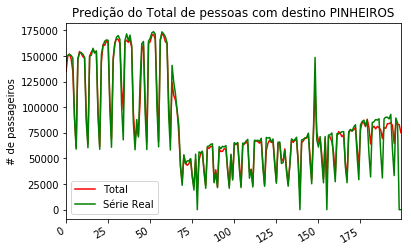

In [72]:
rdm_prediction.plot(label='Série Predita',color='r')
df_modelo['Total'].plot(label='Série Real',color='g')
plt.gcf().autofmt_xdate()
plt.ylabel('# de passageiros')
plt.title('Predição do Total de pessoas com destino ' + str(name_region))
plt.legend()

Exibe a importância de cada feature na regressão

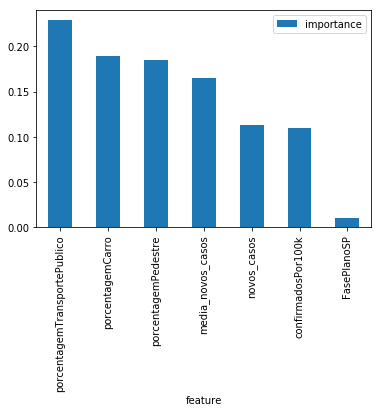

In [28]:
feature_importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rdm_forest.feature_importances_,3)})
feature_importances = feature_importances.sort_values('importance',ascending=False).set_index('feature')
feature_importances.plot.bar()

O gráfico de importância das features nos mostra que a fase do plano SP é a feature de menor importância na tarefa de regressão. Entretanto, isso não corresponde com a realidade, já que a fase determina a abertura e fechamento dos restaurantes. Isso se deve ao fato dos dados do plano SP estarem disponíveis somente a partir da data x. <br>

Vamos realizar um preenchimento mais fiel com o que ocorreu na realidade, com base na data do decreto de quarententa, estabelecendo essa como a fase vermelha. <br>

Fechamento: 20/03/2020 - Fonte: http://www.capital.sp.gov.br/noticia/periodo-de-quarentena-o-que-abre-e-o-que-fecha-na-cidade-de-sao-paulo <br>
Reabertura: 06/07/2020 - Fonte: http://www.capital.sp.gov.br/noticia/prefeitura-assina-protocolos-de-reabertura-com-entidades-de-bares-restaurantes-e-saloes-de-beleza

In [29]:
# Pega o indice em que ocorreu o fechamento dos restaurantes
index_fechamento = df_modelo.index[df_modelo['data']=='2020-03-20'][0]
print(index_fechamento)
# Aplica o valor 5 para os dias anteriores ao fechamento
df_modelo['FasePlanoSP'][df_modelo.index<index_fechamento] = 5
df_modelo.describe()

67


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,porcentagemCarro,porcentagemTransportePublico,porcentagemPedestre,confirmadosPor100k,novos_casos,media_novos_casos,FasePlanoSP,Total
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-0.293921,-0.490755,-0.416260,367.787099,968.420000,918.085000,2.415000,82425.150000
std,0.300900,0.382658,0.384806,483.568342,1238.114937,949.243520,2.127299,46705.716266
min,-0.754500,-0.873100,-0.843100,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.566325,-0.788225,-0.726917,0.016320,0.000000,0.250000,0.000000,54018.250000
50%,-0.362100,-0.670500,-0.574700,85.834805,436.000000,473.785714,2.000000,69814.000000
75%,0.020850,-0.208625,-0.011100,662.027405,1522.500000,1946.035714,5.000000,97318.000000
max,0.409700,0.321400,0.731500,1580.832810,6877.000000,2853.428571,5.000000,173826.000000


Refaz o trei

In [30]:
x_train = df_modelo.drop(['data','novos_casos','confirmadosPor100k','Total'], axis=1)[df_modelo.index<186]
x_test  = df_modelo.drop(['data','novos_casos','confirmadosPor100k','Total'], axis=1)[df_modelo.index>=186]

y_train = df_modelo['Total'][df_modelo.index<186]
y_test = df_modelo['Total'][df_modelo.index>=186]


In [31]:
# Construindo o modelo por florestas aleatórias
model = RandomForestRegressor(n_estimators=200,max_features=1, oob_score=True, min_samples_leaf = 2, criterion='mae')

# Separa os labels da variável a ser predita
labels = y_train
# Separa todas as features a serem usadas na regressão
features = x_train

# Faz a regressão com base nos dados de treinamento
rdm_forest = model.fit(features, labels)

y_test_prediction = pd.DataFrame(rdm_forest.predict(x_test)).rename(columns={0:'TotalPercentual'}).set_index('TotalPercentual')
y_train_prediction = pd.DataFrame(rdm_forest.predict(x_train)).rename(columns={0:'TotalPercentual'}).set_index('TotalPercentual')
                                  
# combine the training and testing dataframes to visualize
# and compare.
rdm_prediction = y_train_prediction.append(y_test_prediction)
rdm_prediction.reset_index(inplace=True)

Exibe a série temporal predita, em vermelho, e os dados reais da série em verde

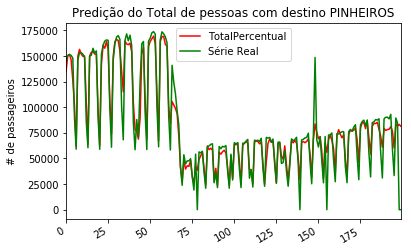

In [32]:
rdm_prediction.plot(label='Série Predita',color='r')
df_modelo['Total'].plot(label='Série Real',color='g')
plt.gcf().autofmt_xdate()
plt.ylabel('# de passageiros')
plt.title('Predição do Total de pessoas com destino ' + str(name_region))
plt.legend()

Exibe a importância de cada feature na regressão

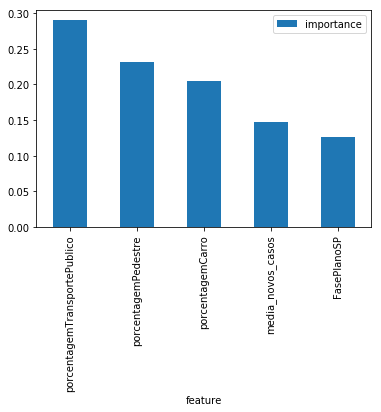

In [33]:
feature_importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rdm_forest.feature_importances_,3)})
feature_importances = feature_importances.sort_values('importance',ascending=False).set_index('feature')
feature_importances.plot.bar()

## KNN

Importa os pacotes necessários para a implementação